## Exercise 1 - Bayes classification system

In [333]:
# Import some useful libraries

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

## 1a. Getting started with Bayes

a) Read the training data from file ex1-data-train.csv. The first two columns are x1 and x2. The last column holds the class label y.

In [334]:
def read_data(file):
    dataset = pd.read_csv(file, names=['x1','x2','y'])
    print(dataset.head())
    return dataset[["x1", "x2"]], dataset["y"].values

In [335]:
X_train, y_train = read_data("ex1-data-train.csv")

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1


In [336]:
# Prepare a function to compute accuracy
def accuracy_score(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true.size

b) Compute the priors of both classes P(C0) and P(C1)

In [337]:
# TODO: Compute the priors

# P(Ck) = nombre d’échantillons de la classe k / nombre total d’échantillons
p_c0 = np.mean(y_train == 0)  # P(C0) = N0 / total
p_c1 = np.mean(y_train == 1)  # P(C1) = N1 / total

print("PC0 = "+str(p_c0))
print("PC1 = "+str(p_c1))

PC0 = 0.4
PC1 = 0.6


c) Compute histograms of x1 and x2 for each class (total of 4 histograms). Plot these histograms. Advice : use the numpy `histogram(a, bins="auto")` function.

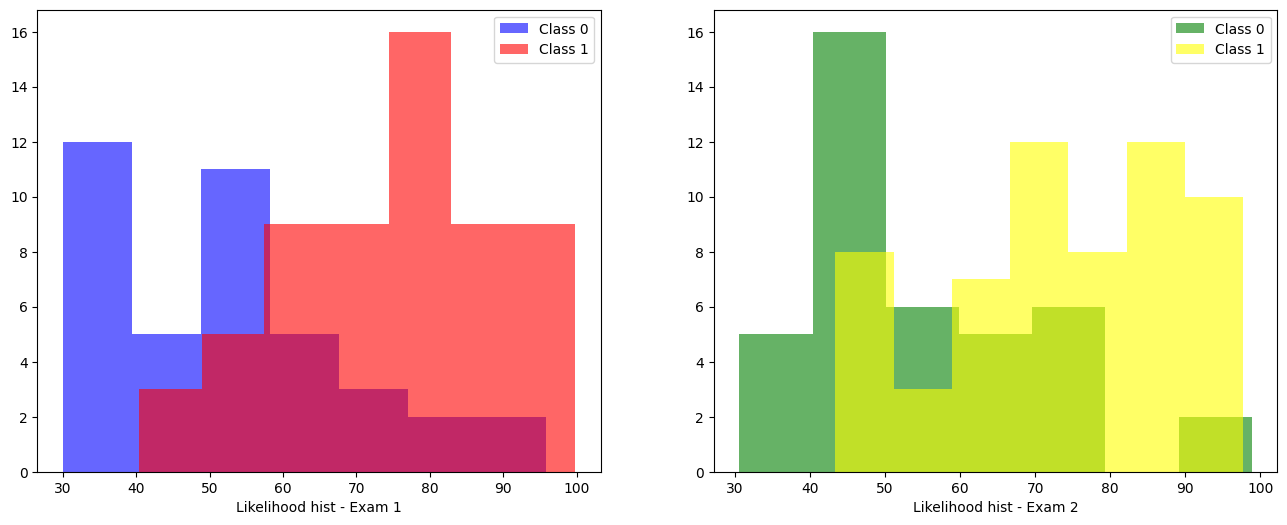

In [338]:
# TODO: Compute histograms

# --- Compute histograms and plot ---
x1_c0 = X_train["x1"][y_train == 0]
x1_c1 = X_train["x1"][y_train == 1]
x2_c0 = X_train["x2"][y_train == 0]
x2_c1 = X_train["x2"][y_train == 1]

# besoin de faire ça pour plus bas (predict on test set)
hist_x1_c0, bins_x1_c0 = np.histogram(x1_c0, bins="auto")
hist_x1_c1, bins_x1_c1 = np.histogram(x1_c1, bins="auto")
hist_x2_c0, bins_x2_c0 = np.histogram(x2_c0, bins="auto")
hist_x2_c1, bins_x2_c1 = np.histogram(x2_c1, bins="auto")


# TODO: plot histograms

plt.figure(figsize=(16,6))

# Histogram x1
plt.subplot(1, 2, 1)
plt.hist(x1_c0, bins="auto", alpha=0.6, color="blue", label="Class 0")
plt.hist(x1_c1, bins="auto", alpha=0.6, color="red", label="Class 1")
plt.xlabel('Likelihood hist - Exam 1')
plt.legend()

# Histogram x2
plt.subplot(1, 2, 2)
plt.hist(x2_c0, bins="auto", alpha=0.6, color="green", label="Class 0")
plt.hist(x2_c1, bins="auto", alpha=0.6, color="yellow", label="Class 1")
plt.xlabel('Likelihood hist - Exam 2')
plt.legend()

plt.show()


d) Use the histograms to compute the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). For this define a function `likelihood_hist(x, hist_values, edge_values)` that returns the likelihood of x for a given histogram (defined by its values and bin edges as returned by the numpy `histogram()` function).

In [339]:
def likelihood_hist(x: float, hist_values: np.ndarray, bin_edges: np.ndarray) -> float:
    # index qui contient x
    bin_index = np.searchsorted(bin_edges, x, side="right") - 1

    # hors intervale 
    if bin_index < 0 or bin_index >= len(hist_values):
        return 0.0

    # compter total
    total = hist_values.sum()
    if total == 0:
        return 0.0 # rend 0 rien si 0
    return hist_values[bin_index] / total # rend la proba

e) Implement the classification decision according to Bayes rule and compute the overall accuracy of the system on the test set ex1-data-test.csv. :
- using only feature x1
- using only feature x2
- using x1 and x2 making the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck)

In [340]:
X_test, y_test = read_data("ex1-data-test.csv")

          x1         x2  y
0  39.196334  78.530294  0
1  40.448499  86.839470  1
2  65.571920  44.303497  0
3  79.648113  70.806564  1
4  66.260221  41.672703  0


In [341]:
# TODO: predict on test set in the 3 cases described above
y_pred = []
for v in X_test["x1"]:
    p0 = likelihood_hist(v, hist_x1_c0, bins_x1_c0) * p_c0
    p1 = likelihood_hist(v, hist_x1_c1, bins_x1_c1) * p_c1
    
    classe = 0
    if p1 > p0:
        classe = 1
    y_pred.append(classe)

print("Accuracy x1 :", accuracy_score(y_test, y_pred))

Accuracy x1 : 0.7


In [342]:
y_pred = []
for v in X_test["x2"]:
    p0 = likelihood_hist(v, hist_x2_c0, bins_x2_c0) * p_c0
    p1 = likelihood_hist(v, hist_x2_c1, bins_x2_c1) * p_c1
    classe = 0
    if p1 > p0:
        classe = 1
    y_pred.append(classe)
print("Accuracy x2 :", accuracy_score(y_test, y_pred))


Accuracy x2 : 0.73


In [343]:

y_pred = []

for i in range(len(X_test)):
    x1_value = X_test.iloc[i]["x1"]
    x2_value = X_test.iloc[i]["x2"]

    p1 = likelihood_hist(x1_value, hist_x1_c0, bins_x1_c0) * p_c0 * likelihood_hist(x2_value, hist_x2_c0, bins_x2_c0) * p_c0
    p2 = likelihood_hist(x1_value, hist_x1_c1, bins_x1_c1) * p_c1 * likelihood_hist(x2_value, hist_x2_c1, bins_x2_c1) * p_c1

    # on prend la classe avec + proba
    if p2 > p1:
        y_pred.append(1)
    else:
        y_pred.append(0)
    
print("Accuracy x1 + x2  :", accuracy_score(y_test, y_pred))

Accuracy x1 + x2  : 0.92


Which system is the best ?

Le meilleur c'est celui lorsqu'on combine les deux features (Naive Bayes). Le modèle est plus fiable lorsqu'on utilise les deux car il a plus d'informations pour séparer les classes et baiser l'influence des valeurs bizarre. 

## 1b. Bayes - Univariate Gaussian distribution

Do the same as in a) but this time using univariate Gaussian distribution to model the likelihoods p(x1|C0), p(x1|C1), p(x2|C0) and p(x2|C1). You may use the numpy functions `mean()` and `var()` to compute the mean μ and variance σ2 of the distribution. To model the likelihood of both features, you may also do the naive Bayes hypothesis of feature independence, i.e. p(X|Ck) = p(x1|Ck) · p(x2|Ck).


In [344]:
def likelihood_univariate_gaussian(x: float, mean: float, var: float) -> float:
    # TODO: compute likelihoods from histograms outputs
    coef = 1 / np.sqrt(2 * np.pi * var)
    expo = np.exp(- (x - mean) ** 2 / (2.0 * var))
    return coef * expo

In [345]:
# TODO: Compute mean and variance for each classes and each features (8 values)
# Classe 0
mean_x1_c0 = np.mean(x1_c0)
var_x1_c0  = np.var(x1_c0)
mean_x2_c0 = np.mean(x2_c0)
var_x2_c0  = np.var(x2_c0)

# Classs 2
mean_x1_c1 = np.mean(x1_c1)
var_x1_c1  = np.var(x1_c1)
mean_x2_c1 = np.mean(x2_c1)
var_x2_c1  = np.var(x2_c1)

print("x1 C0:", mean_x1_c0, var_x1_c0)
print("x1 C1:", mean_x1_c1, var_x1_c1)
print("x2 C0:", mean_x2_c0, var_x2_c0)
print("x2 C1:", mean_x2_c1, var_x2_c1)

x1 C0: 52.032301098426046 300.2699173213914
x1 C1: 74.71892269658788 218.67391860154936
x2 C0: 54.62039209636222 252.15212843239624
x2 C1: 73.9564020826201 252.12378022145145


In [346]:
# TODO: predict on test set in the 3 cases

y_pred = []
for i in X_test["x1"]:
    p0 = likelihood_univariate_gaussian(i, mean_x1_c0, var_x1_c0) * p_c0
    p1 = likelihood_univariate_gaussian(i, mean_x1_c1, var_x1_c1) * p_c1

    classe = 0
    if p1 > p0:
        classe = 1
    y_pred.append(classe)

print("Accuracy x1 :", accuracy_score(y_test, y_pred))


Accuracy x1 : 0.71


In [347]:
y_pred = []
for i in X_test["x2"]:
    p0 = likelihood_univariate_gaussian(i, mean_x2_c0, var_x2_c0) * p_c0
    p1 = likelihood_univariate_gaussian(i, mean_x2_c1, var_x2_c1) * p_c1

    classe = 0
    if p1 > p0:
        classe = 1
    y_pred.append(classe)

print("Accuracy x2 :", accuracy_score(y_test, y_pred))


Accuracy x2 : 0.72


In [348]:
y_pred = []

for i in range(len(X_test)):

    # récupère la valeur de x1-2 à la ligne i
    x1_value = X_test.iloc[i]["x1"]
    x2_value = X_test.iloc[i]["x2"]
    
    # (cours) Naive Bayes hypothesis: p(X|C_k)=p(x_1|C_k) * p(x_2|C_k). Then posterior P(C_k|X)\propto p(X|C_k) * P(C_k)
    p0 = likelihood_univariate_gaussian(x1_value, mean_x1_c0, var_x1_c0) * p_c0 * likelihood_univariate_gaussian(x2_value, mean_x2_c0, var_x2_c0) * p_c0
    p1 = likelihood_univariate_gaussian(x1_value, mean_x1_c1, var_x1_c1) * p_c1 * likelihood_univariate_gaussian(x2_value, mean_x2_c1, var_x2_c1) * p_c1

    # on prend la classe avec la plus grande proba
    if p1 > p0:
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Accuracy x1 x2 :", accuracy_score(y_test, y_pred))

Accuracy x1 x2 : 0.92


Pareil l'ajout des deux features donne une meilleure accuracy.